In [ ]:
##########################################################
# DSC5103 Statistics
# Session 9. Trees I
# 2016.12
#
# run decision tree using the tree() and cv.tree() function in the "tree" package
# demo for Regression trees
# using the Hitters dataset in package "ISLR"
##########################################################

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

%matplotlib inline

In [2]:
## remove na values
df = pd.read_csv('Hitters.csv').dropna().drop('Player', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [3]:
df['logsal'] = np.log(df.Salary)

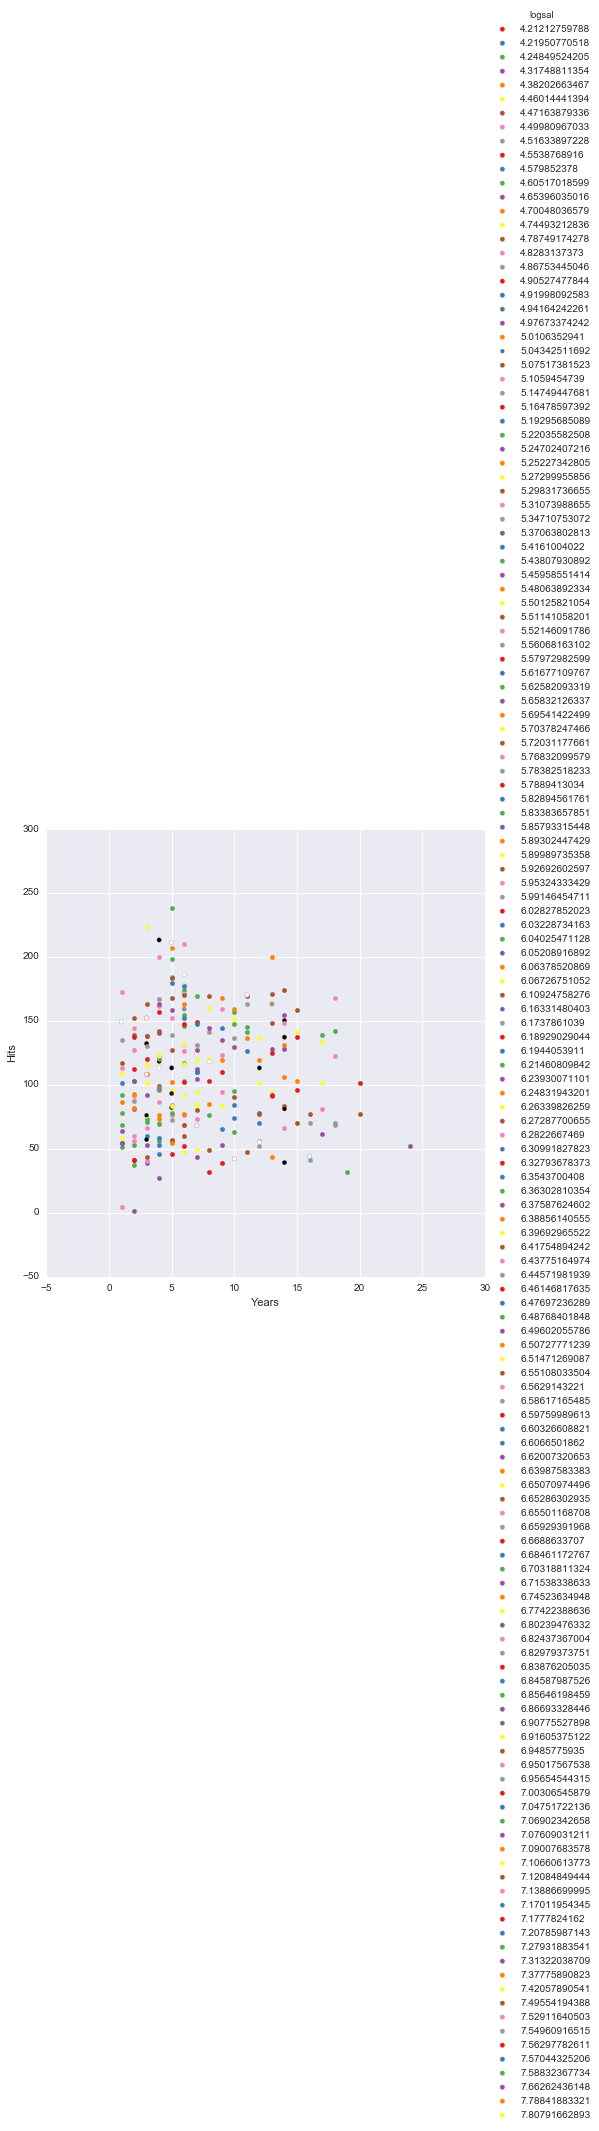

In [4]:
g = sns.FacetGrid(df, hue= 'logsal', palette="Set1", size = 7)
g.map(plt.scatter, 'Years', 'Hits').add_legend()

In [5]:
## grow a tree

X = df[['Years','Hits']]
y = df.logsal

# choosing max_leaf_nodes 7 (max_depth can be set as well)
regr1 = DecisionTreeRegressor(max_leaf_nodes=7)
regr1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=7, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

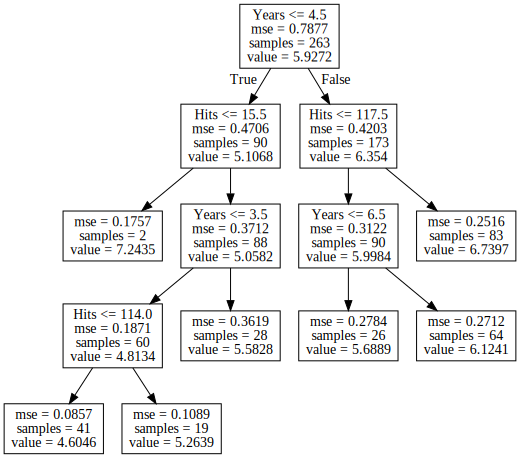

In [6]:
export_graphviz(regr1, out_file="mytree.dot", feature_names=X.columns)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [7]:
## pruning the tree with GridSearchCV
from sklearn.grid_search import GridSearchCV

In [8]:
regpruned = DecisionTreeRegressor()

In [9]:
parameters = {'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}

In [10]:
# http://scikit-learn.org/stable/modules/model_evaluation.html
gs = GridSearchCV(regpruned, param_grid=parameters, scoring='mean_squared_error', n_jobs=4, cv=10)
# Valid options are ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 
# 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 
# 'mean_squared_error', 'median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 
# 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 
# 'recall_weighted', 'roc_auc']

In [11]:
gs.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [12]:
gs.grid_scores_

[mean: -0.44391, std: 0.10895, params: {'max_leaf_nodes': 2},
 mean: -0.36579, std: 0.12239, params: {'max_leaf_nodes': 3},
 mean: -0.37634, std: 0.10806, params: {'max_leaf_nodes': 4},
 mean: -0.33709, std: 0.09946, params: {'max_leaf_nodes': 5},
 mean: -0.29580, std: 0.08127, params: {'max_leaf_nodes': 6},
 mean: -0.30514, std: 0.09104, params: {'max_leaf_nodes': 7},
 mean: -0.33288, std: 0.12930, params: {'max_leaf_nodes': 8},
 mean: -0.32895, std: 0.13780, params: {'max_leaf_nodes': 9},
 mean: -0.30919, std: 0.12662, params: {'max_leaf_nodes': 10},
 mean: -0.31905, std: 0.13109, params: {'max_leaf_nodes': 11},
 mean: -0.31281, std: 0.12937, params: {'max_leaf_nodes': 12},
 mean: -0.31910, std: 0.13370, params: {'max_leaf_nodes': 13},
 mean: -0.31959, std: 0.13235, params: {'max_leaf_nodes': 14}]

In [13]:
print("BEST", gs.best_params_, gs.best_score_)

BEST {'max_leaf_nodes': 6} -0.295797977487


In [14]:
best = gs.best_estimator_  # the best model

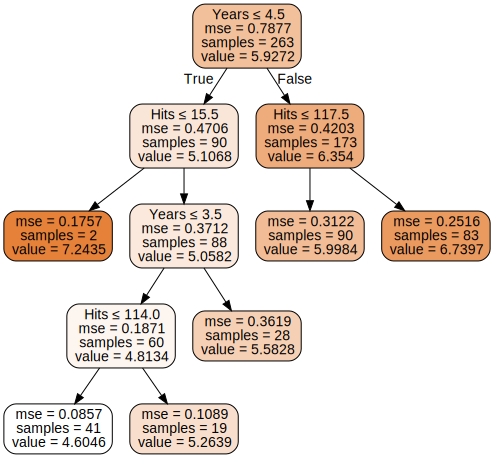

In [16]:
export_graphviz(best, out_file="mytree.dot", feature_names=X.columns, 
                filled=True, rounded=True, special_characters=True)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)